In [127]:
# library imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
# reading csv to df
# Student information from math and portuguese classes respectively
math_df = pd.read_csv('student-mat.csv')
port_df = pd.read_csv('student-por.csv')

#merge data frames
port_df['Class'] = 'Portuguese'
math_df['Class'] = 'Math'
df = pd.concat([port_df, math_df], ignore_index=True)


In [138]:
print("Seeing all the possible entries: ", df.apply(lambda x: x.unique()) )

# data size before dropping NA
print(df.shape)

df.dropna(inplace=True)

# data size after dropping NA
print(df.shape)

df.drop_duplicates(inplace=True)

print(df.shape)



Seeing all the possible entries:  school                                                 [GP, MS]
sex                                                      [F, M]
age                            [18, 17, 15, 16, 19, 22, 20, 21]
address                                                  [U, R]
famsize                                              [GT3, LE3]
Pstatus                                                  [A, T]
Medu                                            [4, 1, 3, 2, 0]
Fedu                                            [4, 1, 2, 3, 0]
Mjob                [at_home, health, other, services, teacher]
Fjob                [teacher, other, services, health, at_home]
reason                        [course, other, home, reputation]
guardian                                [mother, father, other]
traveltime                                         [2, 1, 3, 4]
studytime                                          [2, 3, 1, 4]
failures                                           [0, 3, 1, 2]
school

In [123]:
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,Math
1040,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,Math
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,Math
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,Math


In [124]:
# mean workday and weekend alcohol consumption by school
print(df[['school', 'Dalc', 'Walc']].groupby('school').agg('mean'))
# mean workday and weekend alcohol consumption by sex
print(df[['sex', 'Dalc', 'Walc']].groupby('sex').agg('mean'))


            Dalc      Walc
school                    
GP      1.458549  2.264249
MS      1.595588  2.341912
         Dalc      Walc
sex                    
F    1.274112  1.944162
M    1.781457  2.728477


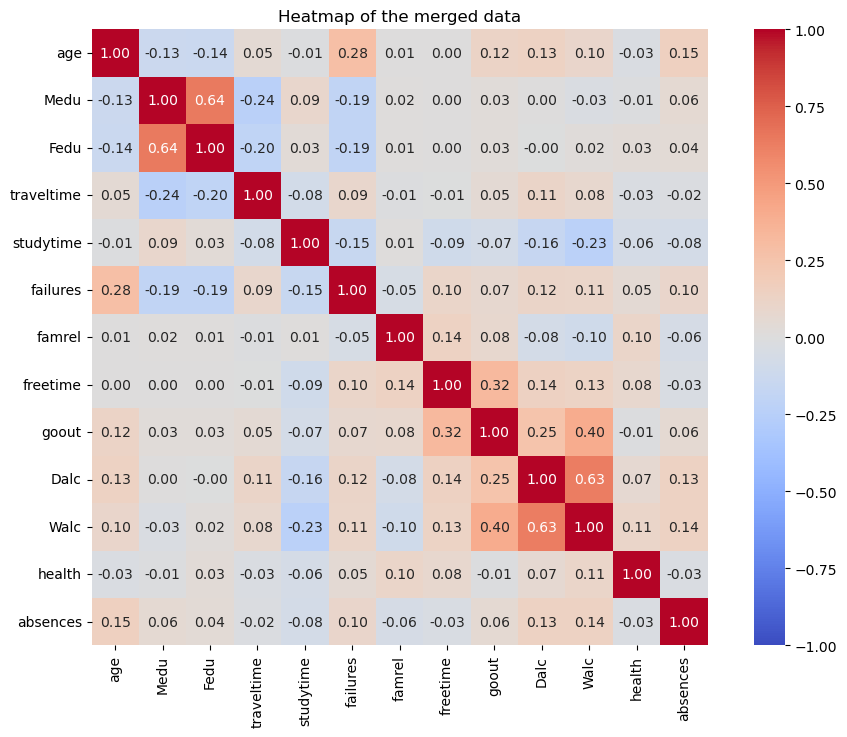

In [143]:
df_adj = df.drop(columns = ['G1','G2','G3'])
corr_matrix = df_adj.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', square=True)
plt.title('Heatmap of the merged data')
plt.show()
